In [1]:
# Chargement des bibliothèques
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Stockage des labels et de données  dans une liste 
data = []
labels = []
classes = 43
# getcwd() retourne le dossier de travail courant
cur_path = os.getcwd()


# Récupération des données et des labels
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Conversion des listes en tableau np.array
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

#Fractionnement des données en jeu de test et de données
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Encodage des labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Epoch 1/15
981/981 [==============================] - 53s 54ms/step - loss: 1.7527 - accuracy: 0.5544 - val_loss: 0.3222 - val_accuracy: 0.9157
Epoch 2/15
981/981 [==============================] - 53s 54ms/step - loss: 0.5307 - accuracy: 0.8500 - val_loss: 0.1641 - val_accuracy: 0.9628
Epoch 3/15
981/981 [==============================] - 53s 54ms/step - loss: 0.3288 - accuracy: 0.9075 - val_loss: 0.1435 - val_accuracy: 0.9637
Epoch 4/15
981/981 [==============================] - 53s 54ms/step - loss: 0.2931 - accuracy: 0.9210 - val_loss: 0.1043 - val_accuracy: 0.9698
Epoch 5/15
981/981 [==============================] - 55s 56ms/step - loss: 0.2500 - accuracy: 0.9301 - val_loss: 0.0815 - val_accuracy: 0.9777
Epoch 6/15
981/981 [==============================] - 57s 58ms/step - loss: 0.2520 - accuracy: 0.9331 - val_loss: 0.0784 - val_accuracy: 0.9782
Epoch 7/15
981/981 [==============================] - 57s 58ms/step - loss: 0.2402 - accuracy: 0.9386 - val_loss: 0.0997 - val_accuracy:

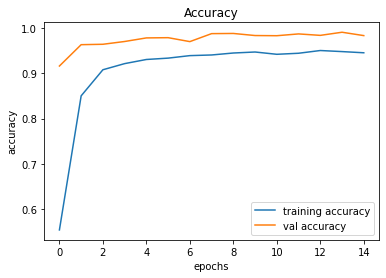

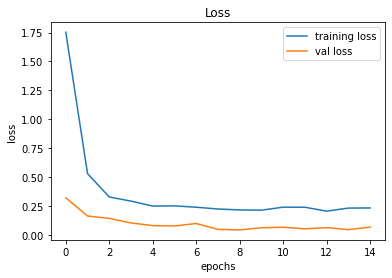

In [2]:
# Construction du modèle
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

# Traçage des graphiques pour plus de précision
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [3]:
# Test de la précision sur l'ensemble de données de test
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

# Ouverture des images(données) et redimensionnement
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)

# Précision avec les données de test
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

# Sauvegarde du modèle
model.save('traffic_classifier.h5')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.9436262866191607


In [ ]:
# Précision du modèle à 94 % 
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
# Chargement du modèle
from keras.models import load_model
model = load_model('traffic_classifier.h5')

# Dictionnaire de tous les labels
classes = { 1:'Limite de vitesse (20km/h)',
            2:'Limite de vitesse (30km/h)', 
            3:'Limite de vitesse (50km/h)', 
            4:'Limite de vitesset (60km/h)', 
            5:'Limite de vitesse (70km/h)', 
            6:'Limite de vitesse (80km/h)', 
            7:'Fin de limite de vistesse (80km/h)', 
            8:'Limite de vitesse (100km/h)', 
            9:'Limite de vitesse (120km/h)', 
            10:'Dépassement interdit', 
            11:'Dépassement interdit pour les plus de 3,5 tonnes', 
            12:'Priorité à droite', 
            13:'Route prioritaire', 
            14:'Cédez le passage', 
            15:'Stop', 
            16:'Véhicule interdit', 
            17:'Interdit au plus de 3 tonnes', 
            18:'No entry', 
            19:'Danger', 
            20:'Virage à gauche dangereux', 
            21:'Virage à droite dangeureux', 
            22:'Virages', 
            23:"Dos d'âne", 
            24:'Route glissante', 
            25:'Route serrée à droite', 
            26:'Route en travaux', 
            27:'Feux tricolore', 
            28:'Passage piétons', 
            29:"Passage d'enfants", 
            30:'Piste cyclable', 
            31:'Attention à la neige et au gel',
            32:"Traversée d'animaux", 
            33:'Fin de toutes les interdictions', 
            34:'Tourner obligatoirement à droite', 
            35:'Tourner obligatoire à gauche', 
            36:'Aller obligatoirement tout droit', 
            37:'Aller à droite ou tout droit', 
            38:'Aller à gauche ou tout droit', 
            39:'Restez à droite', 
            40:'restez à gauche', 
            41:'Rond-point', 
            42:'Fin de dépassement', 
            43:'Fin de dépassement pour les plus de 3,5 tonnes' }


In [ ]:
# Initialisation de la fenêtre de l'application
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

# Fonction de classification
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

# Fonction pour le bouton afin de classifier le panneau(image)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
    
# Fonction de chargement d'image    
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass



upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()